# Week 9
- Confusion matrix
- Visualize the cf
- ROC
- AUC-ROC
- Feature engineering Linear regression

In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

- Train an sklearn logistic regressor
- We'll make some predictions
- Confusion matrix using sklearn
- Try it ourselves
- Visualize the confusion matrix

In [2]:
path = "https://raw.githubusercontent.com/Armagaan/"\
        "Data-Analytics-with-Python/main/week-9/Simmons.csv"

df = pd.read_csv(path, header=0)
df = df.drop("Customer", axis=1)
df.head(100)

,Spending,Card,Coupon
0,2.291,1,0
1,3.215,1,0
2,2.135,1,0
3,3.924,0,0
4,2.528,1,0
...,...,...,...
95,3.318,0,0
96,2.421,1,0
97,6.073,0,0
98,2.630,1,0


In [3]:
df = df.sample(frac=1.0, random_state=0).reset_index(drop=True)
df.head()

split_index = int(0.8 * len(df))

x_train = df.drop("Coupon", axis=1).iloc[:split_index]
x_test  = df.drop("Coupon", axis=1).iloc[split_index:]

y_train = df.Coupon.iloc[:split_index]
y_test  = df.Coupon.iloc[split_index:]

In [4]:
df.Coupon.value_counts()

0    60
1    40
Name: Coupon, dtype: int64

In [5]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [6]:
proba_train = model.predict_proba(x_train)[:, 1]

In [7]:
def predict(probabilities, threshold):
    return (probabilities >= threshold).astype(int)

predict(proba_train, 0.5)

array([1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1])

In [11]:
y_train.values

array([1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1])

## Confusion matrix

In [8]:
import numpy as np
from sklearn.metrics import confusion_matrix

In [9]:
conf_mat = confusion_matrix(y_true=y_train, y_pred=predict(proba_train, 0.5))
print(conf_mat)

[[40  7]
 [17 16]]


In [12]:
def cal_confusion_matrix(y_true, y_pred):
    tp, tn, fp, fn = 0, 0, 0, 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 0:
            if yp == 0:
                tn += 1
            else:
                fp += 1
        else:
            if yp == 1:
                tp += 1
            else:
                fn += 1
    conf_mat = np.array([[tn, fp], [fn, tp]])
    return conf_mat

In [13]:
cal_confusion_matrix(y_train, predict(proba_train, 0.5))

array([[40,  7],
       [17, 16]])

## Visualize the confusion matrix

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

<Axes: >

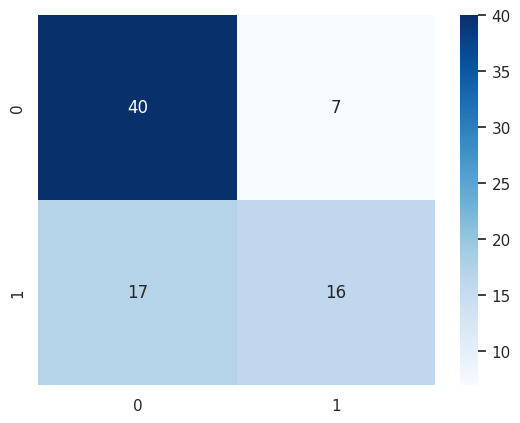

In [19]:
sns.heatmap(conf_mat, annot=True, cmap="Blues")

## ROC

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
proba_test = model.predict_proba(x_test)

In [ ]:
fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=proba_test[:, 1], pos_label=1)

In [ ]:
fpr

array([0.        , 0.        , 0.        , 0.15384615, 0.15384615,
       0.61538462, 0.69230769, 0.76923077, 0.76923077, 1.        ])

In [ ]:
tpr

array([0.        , 0.14285714, 0.42857143, 0.42857143, 0.71428571,
       0.71428571, 0.85714286, 0.85714286, 1.        , 1.        ])

In [ ]:
thresholds

array([1.74769214, 0.74769214, 0.60874317, 0.55736114, 0.45903762,
       0.32533883, 0.31097343, 0.28515355, 0.24883399, 0.2009696 ])

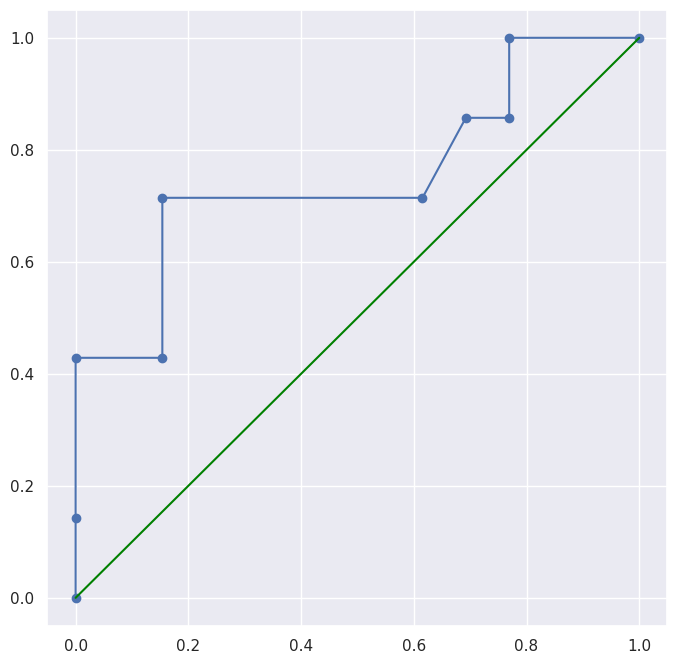

In [ ]:
plt.figure(figsize=(8,8))

x_range = np.linspace(0,1,10)
y_range = np.linspace(0,1,10)

plt.plot(fpr, tpr, marker="o")
plt.plot(x_range, y_range, color="green")
plt.plot([0,0], [1,1], "r-")

## Polynomial Regression
- Before deep learning, your model did not come up with its own featuers.
- Hence, most of the work went into feature engineering.
- Polynomial regression is simple feature engineering for linear regression models.

In [ ]:
# Polynomial regression

# Step 1: clean

# Step 2: preprocessing step: feature engineering
# columns: x, y, z

# Say degree 2:
# x, y, z
# xx yy zz xy yz xz

# Degree 3
# xxx, xxy, ...